# ABOUT THE DATESETS
Social Buzz is a fast growing technology unicorn that need to adapt quickly to it's global scale. Over the past 5 years, Social Buzz has reached over 500 million active users each month. Due to their rapid growth and digital nature of their core product, the amount of data that they create, collect and must analyze is huge. Every day over 100,000 pieces of content, ranging 
from text, images, videos and GIFs are posted. All of this data is highly unstructured and requires extremely sophisticated and expensive technology to manage and maintain. They have scaled quicker than anticipated and need the help of an advisory firm to oversee their scaling process effectively.This analysis is done to find insights regarding the top 5 most popular categories of content and to create orther useful insights for the company.

# IMPORTING THE LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
sns.set_style("darkgrid")

In [2]:
content = pd.read_csv("Content.csv")
content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


#DROPPING THE IRRELEVANT COLUMNS  

In [3]:
content.drop(["URL", "Unnamed: 0","User ID"], axis= 1, inplace= True)

In [4]:
content["Category"]= content["Category"].str.replace('"', '')
content["Category"]= content["Category"].str.replace('Animals', 'animals')
content["Category"]= content["Category"].str.replace('Healthy Eating', 'healthy eating')
content["Category"]= content["Category"].str.replace('Food', 'food')
content["Category"]= content["Category"].str.replace("Veganism", "veganism")
content["Category"]= content["Category"].str.replace('Culture', 'culture')
content["Category"]= content["Category"].str.replace('Technology', 'technology')
content["Category"]= content["Category"].str.replace('Travel', 'travel')
content["Category"]= content["Category"].str.replace('Education', 'education')
content["Category"]= content["Category"].str.replace('Studying', 'studying')
content["Category"]= content["Category"].str.replace('Soccer', 'soccer')
content["Category"]= content["Category"].str.replace('Science', 'science')
content["Category"]= content["Category"].str.replace('Fitness', 'fitness')
content["Category"]= content["Category"].str.replace('Public Speaking', 'public speaking')

In [5]:
content["Category"].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

In [6]:
content.rename(columns={"Type": "Content Type"}, inplace= True)

In [7]:
content

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [8]:
reactions= pd.read_csv("Reactions.csv")
reactions

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [9]:
#DROPPING THE IRRELEVANT COLUMNS
reactions.drop(["User ID","Unnamed: 0"], axis= 1, inplace= True)

In [10]:
reactions.isna().sum()

Content ID      0
Type          980
Datetime        0
dtype: int64

In [11]:
#DROPPING THE NULL VALUES
reactions.dropna(subset= "Type", axis= 0, inplace= True)

In [12]:
reactions

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [13]:
reaction_type= pd.read_csv("ReactionTypes.csv")
reaction_type

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [14]:
#DROPPING THE IRRELEVANT COLLUMNS
reaction_type.drop("Unnamed: 0", axis= 1, inplace= True)

# MERGING THE 3 DATASETS

In [15]:
a= reactions.merge(content, on= "Content ID")
a

,Content ID,Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [16]:
new_df= a.merge(reaction_type, on = "Type")
new_df

,Content ID,Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [17]:
#new.to_excel("new.xlsx")

# TOP 5 CATEGORIES BASED ON SCORES

In [18]:
cat_score= new_df[["Category", "Score"]]
cat_score

,Category,Score
0,studying,0
1,studying,0
2,studying,0
3,healthy eating,0
4,healthy eating,0
...,...,...
24568,veganism,72
24569,veganism,72
24570,culture,72
24571,culture,72


In [19]:
new_cat_score= cat_score.groupby(new_df["Category"]).sum(numeric_only= True).sort_values("Score", ascending= False)
new_cat_score

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


In [20]:
a=new_cat_score.head(5)
a

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [21]:
#top_5.to_excel("top_5.xlsx")

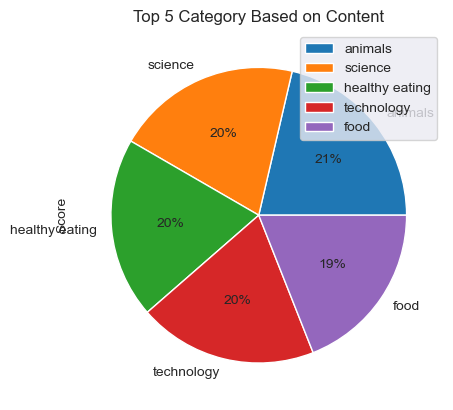

In [22]:
new_cat_score.head(5).plot(kind= "pie",subplots= True, autopct= "%1.0f%%")
plt.title("Top 5 Category Based on Content");

From our analysis, we can see that the top 5 most popular categories of posts were animals, science, healthy eating, technology and food in descending order.

Animals had an aggregate popularity score of around 668624. It is very interesting to see both food and healthy eating within the top 5, it really shows that food is a highly engaging content category. Healthy eating ranks slightly higher than food, so perhaps your user base may be skewed towards healthy eaters and health-conscious people.  

Finally, its also interesting to see science and technology too. This may suggest that people enjoy consuming factual content and snippets of content that they can learn something from.

# AVERAGE CATEGORY SCORE BY YEAR

In [23]:
new_df["Datetime"]= pd.to_datetime(new_df["Datetime"])

In [24]:
new_df["year"]= new_df["Datetime"].dt.year

In [25]:
new_df

,Content ID,Type,Datetime,Content Type,Category,Sentiment,Score,year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0,2021
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0,2020
...,...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72,2020
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72,2020
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72,2020
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72,2020


In [26]:
cs= new_df[["Category", "Score"]]
cs

,Category,Score
0,studying,0
1,studying,0
2,studying,0
3,healthy eating,0
4,healthy eating,0
...,...,...
24568,veganism,72
24569,veganism,72
24570,culture,72
24571,culture,72


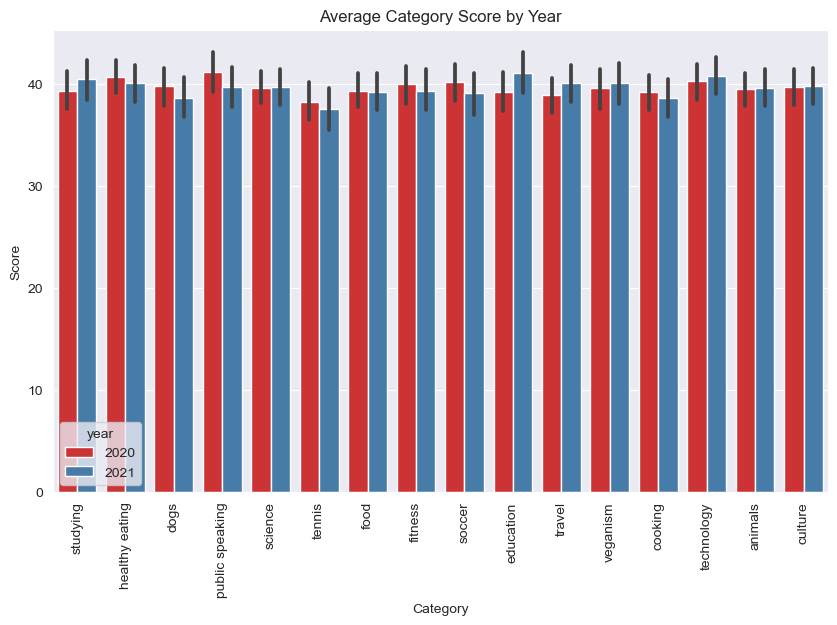

In [27]:
plt.figure(figsize=(10,6))
plt.xticks(rotation= "vertical")
sns.barplot(x= cs["Category"], y= cs["Score"], estimator= np.mean, hue= new_df["year"], palette= "Set1")
plt.title("Average Category Score by Year");

We can see from the chat that the average popularity score in each category tends to be lower in the year 2021 compares to the previous year, 2020. This shows that there is a reduction in the population view and grading. 

Factors responsible for reduction in population view needs to be examined and taken care of so as not to affect the coming year.

# MONTHS WITH MOST POST

In [28]:
new_df["month"]= new_df["Datetime"].dt.month_name().str.slice(stop=3)
new_df["month"].value_counts(ascending= False)

May    2138
Jan    2126
Aug    2114
Dec    2092
Jul    2070
Oct    2056
Nov    2034
Sep    2022
Jun    2021
Mar    2012
Apr    1974
Feb    1914
Name: month, dtype: int64

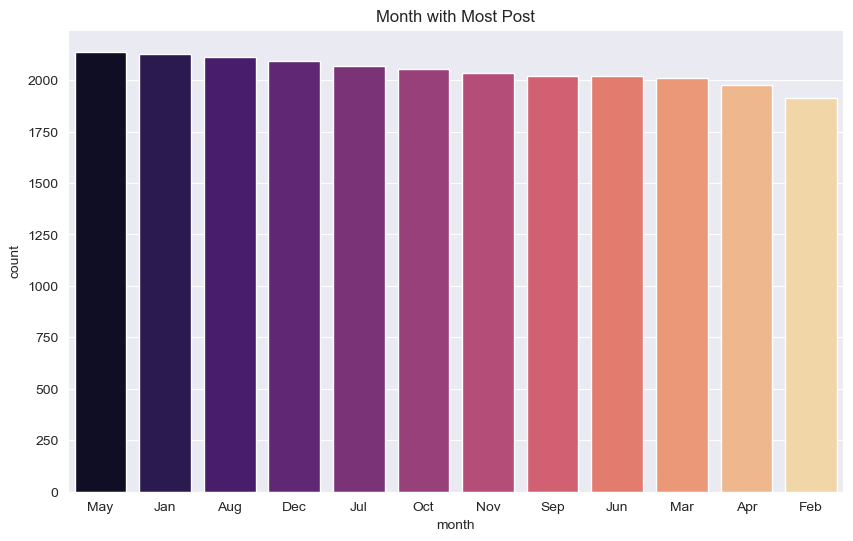

In [29]:
plt.figure(figsize=(10,6))
plt.title("Month with Most Post")
sns.countplot(x= new_df["month"], order= new_df["month"].value_counts(ascending= False).index, palette= "magma");

It is discovered that May, Jan, Aug, Dec are the months people post the most. Jan and Dec present in the top month post aligns with seasonal trends of social media users that feel the need to reconnect with people after calendar events such as Christmas.

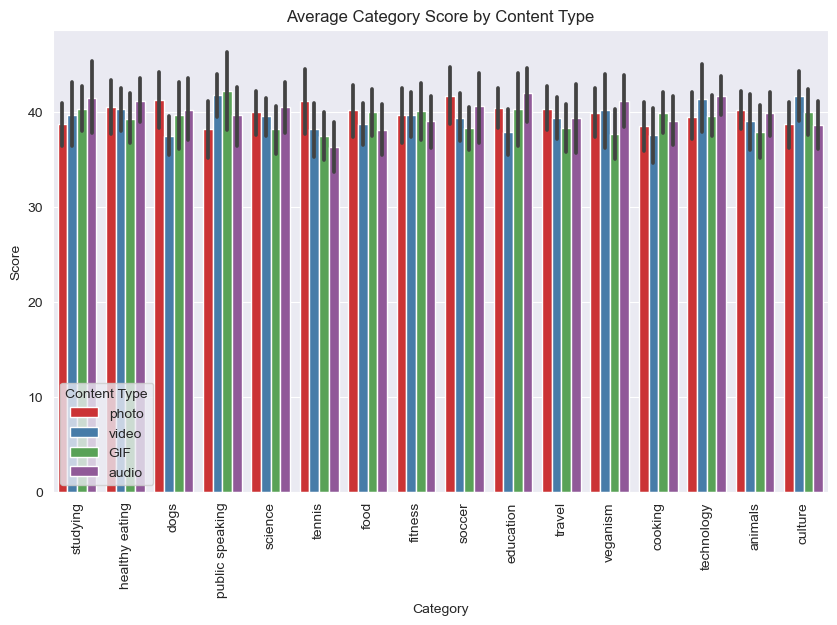

In [30]:
plt.figure(figsize=(10,6))
plt.xticks(rotation= "vertical")
sns.barplot(x= cs["Category"], y= cs["Score"], estimator= np.mean, hue= new_df["Content Type"], palette= "Set1")
plt.title("Average Category Score by Content Type");

In [31]:
cts= new_df[["Content Type","Score"]]
cts

,Content Type,Score
0,photo,0
1,photo,0
2,photo,0
3,photo,0
4,photo,0
...,...,...
24568,audio,72
24569,audio,72
24570,GIF,72
24571,GIF,72


In [32]:
g= cts.groupby(new_df["Content Type"]).sum(numeric_only= True)

<Figure size 400x200 with 0 Axes>

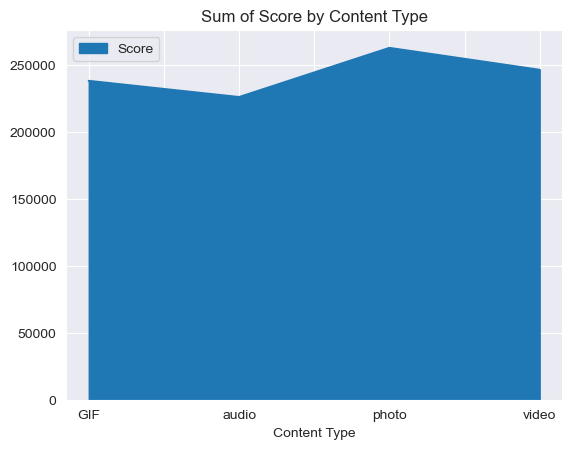

In [33]:
plt.figure(figsize=(4,2))
g.plot(kind= "area")
plt.title("Sum of Score by Content Type");

As seen from the above graph, “photo” has a higher popularity view and score. Which means the company should focus more on producing “photo” content type.
People also responded to videos and GIF stickers

People have a lower interest in audio content type.

“Photo” and “Video” should be the focus center.  

# CONCLUSION
Animals and science are the two most popular categories of content, showing that people enjoy "real-life" and "factual" content the most.
Food is a common theme with the top 5 categories with "Healthy Eating" ranking the highest. This may give an indication to the audience within your user base. You could use this insight to create a campaign and work with healthy eating brands to boost user engagement.